# ROC-curve for logistic regression model

# Imports

In [2]:
'''
Credit to GitHub user Jaimin09
Link: https://github.com/Jaimin09/Coding-Lane-Assets/tree/main/Logistic%20Regression%20in%20Python%20from%20Scratch
Last accessed: 28/10/2021
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import portablelogresmodel as model
import math
from sklearn import metrics
from sklearn.metrics import roc_curve

# ! Get dataset
dec_path = 'Datasets/dec_MPHWA.csv'
dec_df = pd.read_csv(dec_path)
dec_df = dec_df.reset_index()

In [3]:
W_array = np.genfromtxt('Parameters/W.csv', delimiter=',')
B_array = np.genfromtxt('Parameters/B.csv', delimiter=',')

# Roc curve

In [4]:
X_list = ['ID', 
        'PreviousMedals', 
        'Height_div_avg', 
        'Weight_div_avg', 
        'Age_div_avg'
        ]

Y_list = ['ID', 'MedalEarned']


def RocCurve(dec_df, W_array, B_array):
    tp_l = []
    fp_l = []
    
    cop_l = list(range(100, -1, -1))
    
    for i, cop_ in enumerate(cop_l):
        cop = cop_ / 100
        acc_l, occ_l = model.Decathlon(dec_df, X_list, Y_list, W_array, B_array, cop)
        tpr, fpr = model.TPFP(occ_l)
        tp_l.append(tpr)
        fp_l.append(fpr)
    
    # Find smallest distance from optimal
    distance_l = []
    
    for i in range(len(tp_l)):
        distance = abs(math.sqrt((fp_l[i] - 0)**2 + (tp_l[i] - 1)**2))
        distance_l.append(distance)
    
    opt_d = min(distance_l)
    opt_d_ind = distance_l.index(opt_d)
    opt_loc = [tp_l[opt_d_ind] for i in fp_l]
    
    print(f'The optimal cop is: {cop_l[opt_d_ind] / 100}')
    x = np.linspace(0, 1, 100)
    
    # Plot ROC curve
    plt.figure(1)
    plt.plot(fp_l, tp_l)
    plt.plot(x, x, linestyle= ':') # dashed line
    
    plt.plot(fp_l, opt_loc, linestyle= '--', color= 'grey')
    plt.axvline(x= fp_l[opt_d_ind], ymin= 0, ymax= 1, linestyle= '--', color= 'grey')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC curve')
    plt.show()
    
    return tp_l, fp_l

Decathlon results: avg 90.64%  min 90.64%  max 90.64% 
Decathlon results: avg 90.64%  min 90.64%  max 90.64% 
Decathlon results: avg 90.64%  min 90.64%  max 90.64% 
Decathlon results: avg 90.64%  min 90.64%  max 90.64% 
Decathlon results: avg 90.63%  min 90.44%  max 90.64% 
Decathlon results: avg 90.61%  min 90.02%  max 90.64% 
Decathlon results: avg 90.57%  min 89.81%  max 90.64% 
Decathlon results: avg 90.51%  min 89.6%  max 90.64% 
Decathlon results: avg 90.45%  min 89.6%  max 90.64% 
Decathlon results: avg 90.35%  min 89.4%  max 90.64% 
Decathlon results: avg 90.27%  min 89.19%  max 90.64% 
Decathlon results: avg 90.15%  min 88.98%  max 90.64% 
Decathlon results: avg 90.05%  min 88.98%  max 90.64% 
Decathlon results: avg 89.95%  min 88.98%  max 90.64% 
Decathlon results: avg 89.83%  min 88.98%  max 90.64% 
Decathlon results: avg 89.68%  min 88.77%  max 90.64% 
Decathlon results: avg 89.59%  min 88.77%  max 90.64% 
Decathlon results: avg 89.48%  min 88.77%  max 90.64% 
Decathlon res

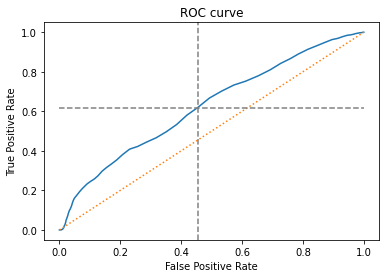

In [5]:
tp_l, fp_l = RocCurve(dec_df, W_array, B_array)

In [6]:
Y_dec = dec_df[Y_list]
X_dec = dec_df[X_list]

W_par = np.array([W_array[0][0], W_array[1][0], W_array[2][0], W_array[3][0]], ndmin= 0)
sf = model.Classify(X_dec, W_par, B_array[0], cop= 0.50)

false_positive_rate, true_positive_rate, threshold = roc_curve(Y_dec, sf)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate_, true_positive_rate_)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ValueError: shapes (4,) and (481,5) not aligned: 4 (dim 0) != 481 (dim 0)